In [1]:
import pandas as pd

In [16]:
dataset = pd.read_csv('Train_data.csv')


In [17]:
# print(dataset.info())


try_x = dataset.isna().sum()
data = try_x.to_dict()

llm = []
for k, va in data.items():
    if va !=0:
        llm.append(k)
print(llm)
    




['dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']


In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [19]:
from sklearn.preprocessing import LabelEncoder
dataset.fillna(int(8000), inplace=True)
for col in llm:
    dataset['status'] = dataset.apply(lambda row: 'yes' if int(8000) in [row[col]] else 'no', axis=1)

print(dataset)

non_b_col = dataset.select_dtypes(exclude=['number'])

le= LabelEncoder()

for col in non_b_col.columns.tolist():
    dataset[col] = le.fit_transform(dataset[col])

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape



       duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0       

(25192, 43)

In [20]:
scaler = MinMaxScaler()

# Fit and transform the dataset
dataset_scaled = scaler.fit_transform(dataset)

# Convert the scaled data back to a DataFrame
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)
# Print the shape of the scaled dataset
print("Shape of scaled dataset:", dataset_scaled.shape)


Shape of scaled dataset: (25192, 43)


In [21]:
variations = []
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

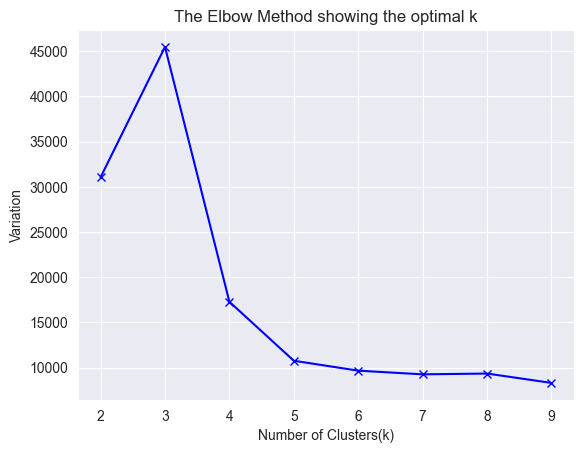

In [ ]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
# Silhouette analysis
range_n_clusters = range(2,10)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("Optimal number of clusters = {}".format(optimal_num_clusters))
    

For n_clusters=2, the silhouette score is 0.39399440758653
For n_clusters=3, the silhouette score is 0.6276563439244497
For n_clusters=4, the silhouette score is 0.566073442750421
For n_clusters=5, the silhouette score is 0.587906941194017
For n_clusters=6, the silhouette score is 0.5806973085776537
For n_clusters=7, the silhouette score is 0.5287125547809194
For n_clusters=8, the silhouette score is 0.48106133714882293
For n_clusters=9, the silhouette score is 0.5663432459503578
Optimal number of clusters = 3


In [ ]:
kmeans = KMeans(n_clusters=optimal_num_clusters, max_iter=50)
kmeans.fit(dataset_scaled)

KMeans(max_iter=50, n_clusters=3)

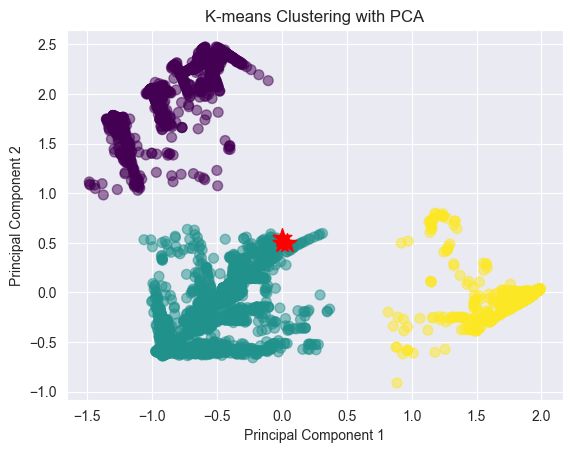

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', s=200)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()

In [ ]:
dataset_scaled['km_clusters'] = kmeans.labels_

In [ ]:
print(dataset_scaled['km_clusters'])

0        1
1        1
2        2
3        1
4        1
        ..
25187    0
25188    1
25189    0
25190    2
25191    2
Name: km_clusters, Length: 25192, dtype: int32


In [ ]:
km_clusters